# **Metal Defect Classification And Prediction**

In [147]:
# Importing all the useful libraries  

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf   #for back-end
%matplotlib inline
from tensorflow import keras #for back-end

from tensorflow.keras import Sequential #for sequentiality of layers

from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D  #for layers,operations and parameters

from tensorflow.keras.preprocessing.image import img_to_array  #to correctly fit the input into the sample data frame by using matrix

import cv2  #image lib

from PIL import Image #image lib

from tensorflow.keras import optimizers 
from tensorflow.keras import datasets, layers, models



### Load the Dataset

In [148]:
# selecting image dimension
img_height=64
img_width=64

# load the dataset
defective=os.listdir("/content/drive/MyDrive/Assignmentcollab/def_front")

ok=os.listdir("/content/drive/MyDrive/Assignmentcollab/ok_front")


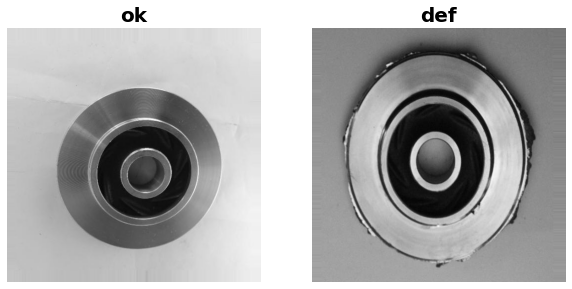

In [149]:
# Sample Image of Okay And Defective Metal

plt.figure(figsize=(10,8))
nk = plt.imread("/content/drive/MyDrive/Assignmentcollab/ok_front/cast_ok_0_1018.jpeg")
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("ok", weight='bold', size=20)
plt.imshow(nk,cmap='gray')

ng = plt.imread("/content/drive/MyDrive/Assignmentcollab/def_front/cast_def_0_0.jpeg")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("def", weight='bold', size=20)
plt.imshow(ng,cmap='gray')

plt.show()


In [151]:
data=[]
label=[]
i=0

In [152]:
# Traversing through image directory

for img in defective :
    try :
        #reading each image
        img_read=plt.imread("/content/drive/MyDrive/Assignmentcollab/def_front"+"/"+img)
        
        #resizing the images
        img_resize=cv2.resize(img_read,(img_height,img_width))
        
        #converting img to array
        img_array=img_to_array(img_resize)
        
        #taking img data
        data.append(img_array)
        
        if i<=2 :
            print(img_array)
        
        #taking ok or no values
        label.append(0)
    
    except :
        None
    i+=1
for img in ok :
    try :
        #reading each image
        img_read=plt.imread("/content/drive/MyDrive/Assignmentcollab/ok_front"+"/"+img)
        
        #resizing the images
        img_resize=cv2.resize(img_read,(img_height,img_width))
        
        #converting img to array
        img_array=img_to_array(img_resize)
        
        #taking img data
        data.append(img_array)
        
        #taking ok or no values
        label.append(1)
    
    except :
        None

[[[176. 176. 176.]
  [175. 175. 175.]
  [178. 178. 178.]
  ...
  [165. 165. 165.]
  [160. 160. 160.]
  [168. 168. 168.]]

 [[176. 176. 176.]
  [175. 175. 175.]
  [178. 178. 178.]
  ...
  [165. 165. 165.]
  [160. 160. 160.]
  [168. 168. 168.]]

 [[178. 178. 178.]
  [179. 179. 179.]
  [179. 179. 179.]
  ...
  [168. 168. 168.]
  [166. 166. 166.]
  [167. 167. 167.]]

 ...

 [[137. 137. 137.]
  [138. 138. 138.]
  [134. 134. 134.]
  ...
  [130. 130. 130.]
  [125. 125. 125.]
  [126. 126. 126.]]

 [[141. 141. 141.]
  [138. 138. 138.]
  [128. 128. 128.]
  ...
  [130. 130. 130.]
  [120. 120. 120.]
  [125. 125. 125.]]

 [[141. 141. 141.]
  [138. 138. 138.]
  [128. 128. 128.]
  ...
  [130. 130. 130.]
  [120. 120. 120.]
  [125. 125. 125.]]]
[[[182. 182. 182.]
  [182. 182. 182.]
  [178. 178. 178.]
  ...
  [175. 175. 175.]
  [175. 175. 175.]
  [178. 178. 178.]]

 [[182. 182. 182.]
  [182. 182. 182.]
  [178. 178. 178.]
  ...
  [175. 175. 175.]
  [175. 175. 175.]
  [178. 178. 178.]]

 [[182. 182. 182.]

In [153]:
#converting data into numpy arrays

img_data=np.array(data)
label1=np.array(label)

# Resizing of image
img_data=img_data/255


In [154]:
img_data.shape[0]

1310

In [155]:
# storing img data into x to get shuffle it

x=np.arange(img_data.shape[0])
np.random.shuffle(x)
img_data=img_data[x]
label2=label1[x]


## Train and Test Split

In [156]:
from sklearn.model_selection import train_test_split

#80 are for training and 20 are for testing in every 101 samples
x_train,x_test,y_train,y_test=train_test_split(img_data,label2,test_size=0.2,random_state=101)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1048, 64, 64, 3) (262, 64, 64, 3) (1048,) (262,)


In [157]:
# Count of defective And Okay Label

train_label=pd.DataFrame(y_train,columns=["label"])
train_defective= train_label[train_label["label"]==0].count()
train_okay=train_label[train_label["label"]==1].count()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


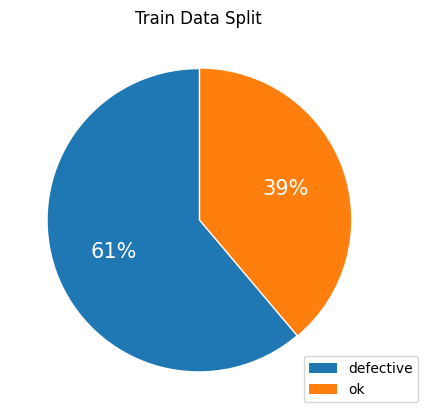

In [158]:
# Graph Representaion of defective and Okay Metals in Training Set

labels=["defective","ok"]

sizes = [train_defective,train_okay]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(labels,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Train Data Split")
plt.show()


## Model Creation

In [159]:
#INPUT LAYER

#creating model
model=Sequential()

#CNN Usage

#for an input layer
model.add(Conv2D(16,(3,3),input_shape=(img_height,img_width,3),activation='relu'))

#normalization
model.add(MaxPool2D(2,2))

model.add(Dropout(0.2))

#Brings data from 3x3 to one dimension
model.add(Flatten())


#HIDDEN LAYERS

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))

#sigmoid is a logistic function----->0 or 1 as output
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 flatten_5 (Flatten)         (None, 15376)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                984128    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

In [160]:
#compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

#model.evaluate(x_test,y_test,batch_size=128,verbose=1)
res_model=model.fit(x_train, y_train, batch_size=50, epochs=50, verbose=1)

Epoch 1/50
21/21 [==============================] - 1s 11ms/step - loss: 0.8054 - accuracy: 0.5821
Epoch 2/50
21/21 [==============================] - 0s 11ms/step - loss: 0.5977 - accuracy: 0.6660
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5767 - accuracy: 0.6517
Epoch 4/50
21/21 [==============================] - 0s 11ms/step - loss: 0.5533 - accuracy: 0.6956
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5247 - accuracy: 0.7261
Epoch 6/50
21/21 [==============================] - 0s 11ms/step - loss: 0.5164 - accuracy: 0.7319
Epoch 7/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5215 - accuracy: 0.7519
Epoch 8/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4881 - accuracy: 0.7729
Epoch 9/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4724 - accuracy: 0.7557
Epoch 10/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4614 - accuracy: 0.7777
Epoch 11/

In [161]:
#predictions by model

predictions=model.evaluate(x_test,y_test)


9/9 [==============================] - 0s 5ms/step - loss: 0.3193 - accuracy: 0.8626


## Graph of Accuracy and Loss of Model

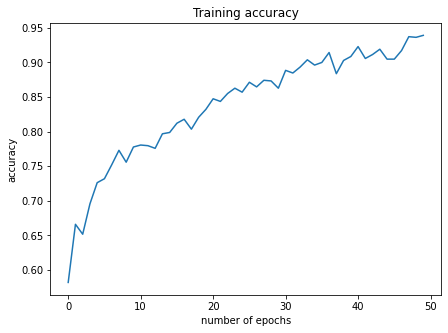

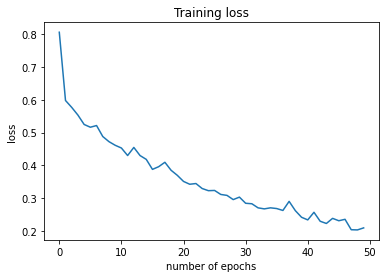

In [162]:
#capturing data
#tf.keras.callbacks.Histroy()

#frame
plt.figure(figsize=(7,5))

acc=res_model.history['accuracy']

loss=res_model.history['loss']

plt.plot(acc)

plt.xlabel('number of epochs')

plt.ylabel('accuracy')

plt.title('Training accuracy')

plt.show()


plt.plot(loss)

plt.xlabel('number of epochs')

plt.ylabel('loss')

plt.title('Training loss')

plt.show()


##0="Defective Metal"
##1="Okay Metal"

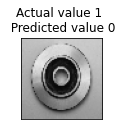

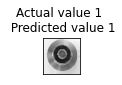

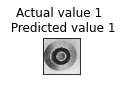

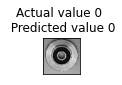

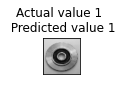

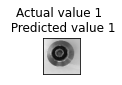

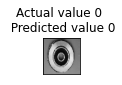

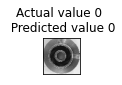

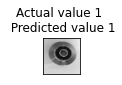

In [173]:
# Predictions on Testing Data

predictions = model.predict(x_test)
plt.figure(1 , figsize = (9, 9))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0] , 1)
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 1.5, wspace = 1.5)
    plt.imshow(x_test[r[0]])
    plt.title('Actual value {} \n Predicted value {}'.format(y_test[r[0]], round(predictions[r[0]][0])))
    plt.xticks([]) , plt.yticks([])
    plt.show()


In [164]:
y_pred = (predictions>= 0.5).reshape(-1,)


In [ ]:

y_test


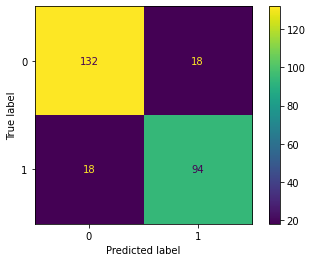

In [166]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()